# problem statement
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
fraud = pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# Renaming columns

fraud = fraud.rename({'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience',}, axis = 1)
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
# checking count of categories for categorical columns

import seaborn as sns

sns.countplot(fraud['Undergrad'])
plt.show()

sns.countplot(fraud['marital_status'])
plt.show()

sns.countplot(fraud['Urban'])
plt.show()



NameError: name 'fraud' is not defined

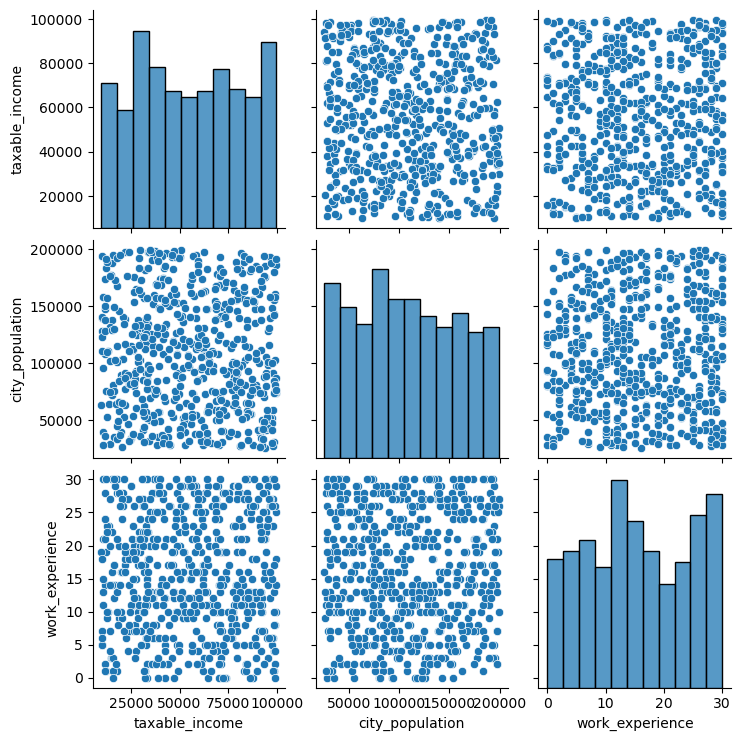

In [7]:
sns.pairplot(fraud)

In [8]:
fraud.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
# Categorizing taxable income into two categories "Good" and "Risky"

fraud['category'] = pd.cut(x = fraud['taxable_income'],
                           bins = [10002,30000,99620], labels = ['Risky', 'Good'] )

In [10]:
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [11]:
fraud.category.value_counts()

Good     476
Risky    124
Name: category, dtype: int64

In [12]:
#Encoding the dataset

label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad']) 
fraud['marital_status']= label_encoder.fit_transform(fraud['marital_status']) 
fraud['Urban']= label_encoder.fit_transform(fraud['Urban']) 
fraud['category']= label_encoder.fit_transform(fraud['category']) 

In [13]:
fraud

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [14]:
#Creating input and output variables

x = pd.concat([fraud.iloc[:,0:2], fraud.iloc[:,3:6]],axis =1)
y = fraud.iloc[:,6]

In [15]:
x

,Undergrad,marital_status,city_population,work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: category, Length: 600, dtype: int32

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7383333333333333


# Checking with other ensemble techniques
1.Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
model_bag = BaggingClassifier(base_estimator = cart, n_estimators = 100)
results1 = cross_val_score(model_bag, x, y, cv=kfold)
print(results1.mean())

0.745


 2.Boosting

In [19]:
from sklearn.ensemble import AdaBoostClassifier

model_boost = AdaBoostClassifier(n_estimators = num_trees)
results2 = cross_val_score(model_boost, x, y, cv=kfold)
print(results2.mean())

0.7716666666666667


 3.Stacking

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
#model3 = SVC()
#estimators.append(('svm', model3))
model3 = AdaBoostClassifier(n_estimators = num_trees)
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7866666666666665


# Inference :
Accuracy on the test data is 78.67% .

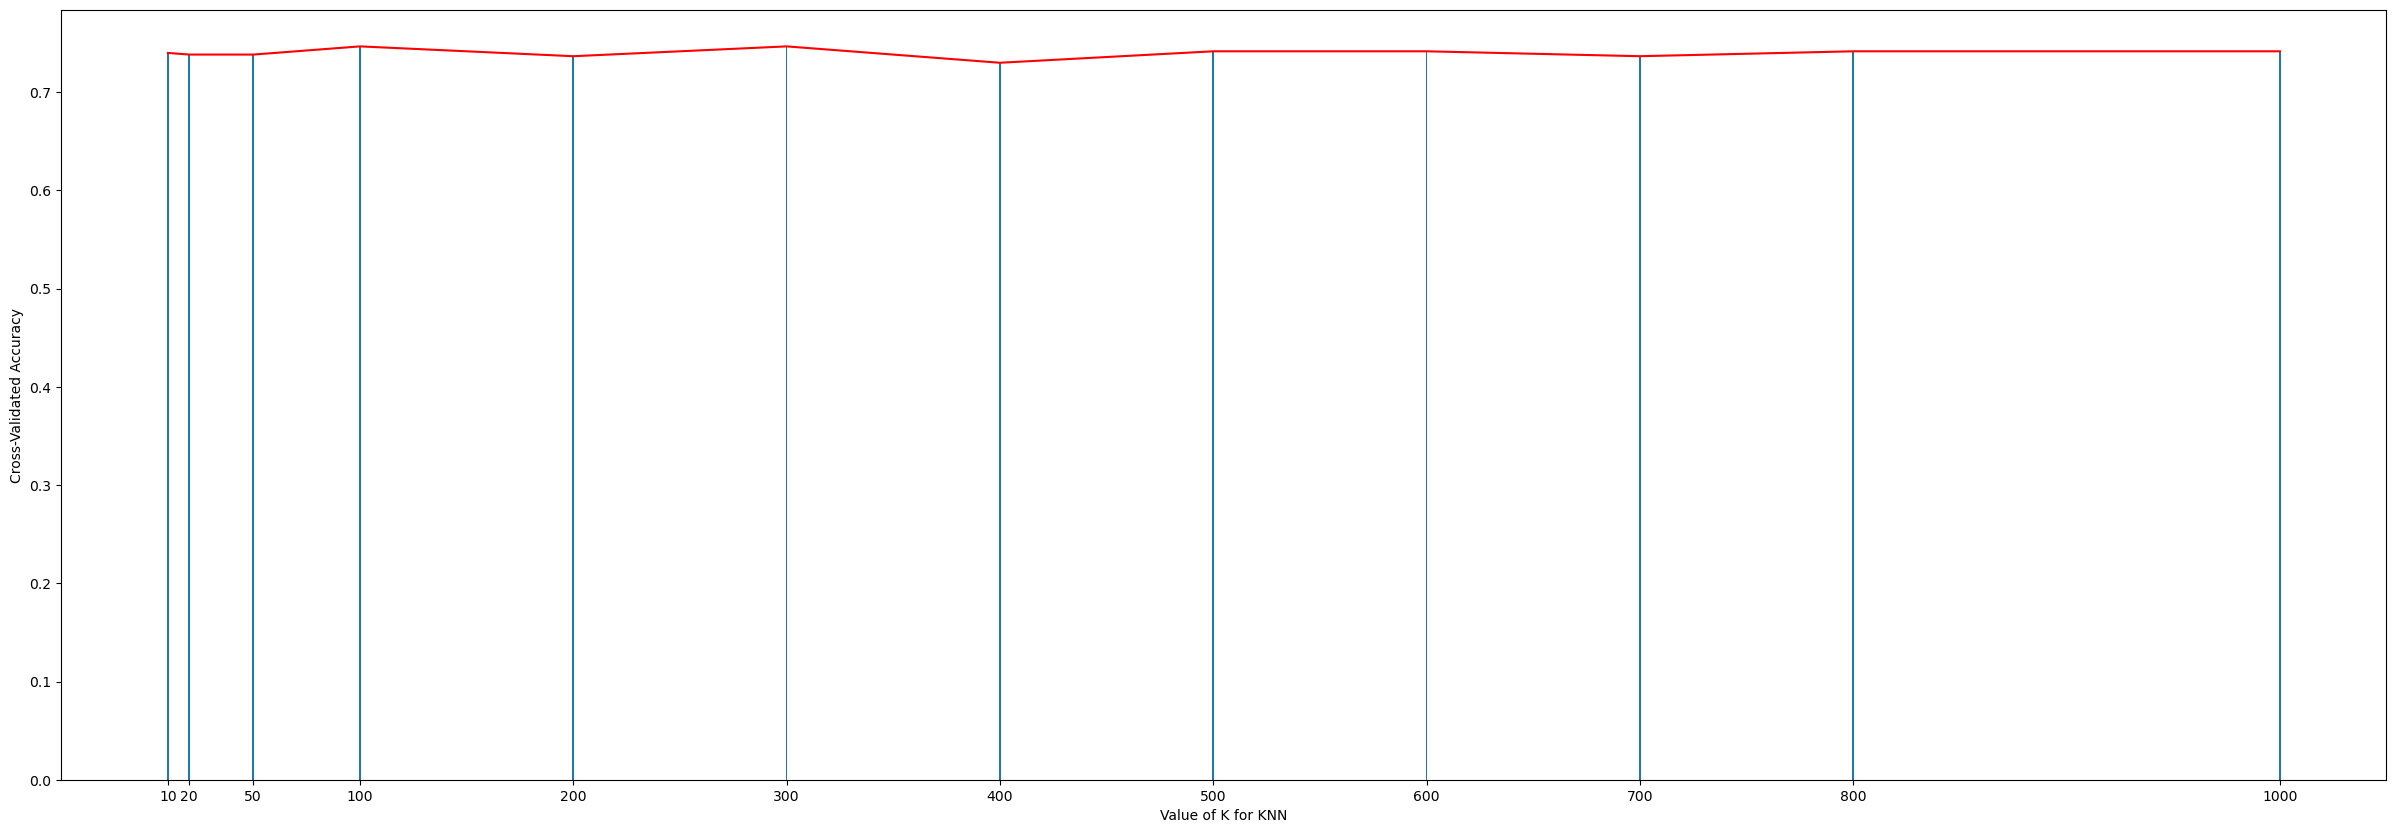

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 41

num_trees = [10,20,50,100,200,300,400,500,600,700,800,1000]
k_scores = []
array = fraud

X = array.iloc[:,[0,1,3,4,5]]
Y = array.iloc[:,6]

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation

for k in num_trees:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X, Y, cv=10)
    k_scores.append(scores.mean())
    
# plot to see clearly

plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(num_trees)
plt.show()